# **Project 1**

*by Allison Porambo
4/7/25*

### **Importing the Dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
county = pd.read_csv('/content/drive/MyDrive/county.csv')

In [ ]:
county.head() #Previewing dataset contents.

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [ ]:
county.shape #Calling the number of observations (rows) and variables (columns).

(3142, 15)

## **Introduction**

The source of the dataset I'm using, "United States Counties", is the US Census Bureau, in particular their "Quick Facts" page. This dataset was accessed through OpenIntro (https://www.openintro.org/data/index.php?data=county).

"United States Counties" includes 14 variables (Python read the line with headers as an additional variable) for 3142 observations. These include simple identifying information including the name of a county and the state in which it is located; the population in 2000, 2010, and 2017; and other (typically financial) measures such as poverty rate, per capita income, and median education.

This data offers numerous pathways for exploration, including the following questions:


1.   Is there a relationship between population change and poverty rate?
2.   Does a relationship exist between a county's median household income and its percentage of housing units in multi-unit structures (apartments, condos, etc.)?
3.   What is the relationship between a county's median education level and unemployment rate?
4.   What is the relationship between per capita income and the status of a county as either a metropolitan or non-metropolitan area?

For the purposes of this project, however, I will focus on the fourth listed question. In particular, I'd like to explore whether or not the higher concentration of both jobs and people in general in urban areas lead to a higher per capita income in urban areas as opposed to rural or suburban areas. In order to do so, I will wrangle the data in the dataset, create exploratory visualizations, and carry out a non-parametric test for the average median per capita income by county in the United States.











### **Wrangle and Prepare Data with Pandas and Numby**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
county.info() # Checking for data types and missing data by variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   state              3142 non-null   object 
 2   pop2000            3139 non-null   float64
 3   pop2010            3142 non-null   int64  
 4   pop2017            3139 non-null   float64
 5   pop_change         3139 non-null   float64
 6   poverty            3140 non-null   float64
 7   homeownership      3142 non-null   float64
 8   multi_unit         3142 non-null   float64
 9   unemployment_rate  3139 non-null   float64
 10  metro              3139 non-null   object 
 11  median_edu         3140 non-null   object 
 12  per_capita_income  3140 non-null   float64
 13  median_hh_income   3140 non-null   float64
 14  smoking_ban        2562 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 368.3+ KB


In [ ]:
county.isnull().sum() #Pulling the actual number of nulls/NAs/NaNs in the dataset by variable.

,0
name,0
state,0
pop2000,3
pop2010,0
pop2017,3
pop_change,3
poverty,2
homeownership,0
multi_unit,0
unemployment_rate,3


By and large, it appears as if most of the observations aren't missing any variables. Save for the classification of a county by whether or not a smoking ban is in place, which has 580 NAs, most of the values of other listed variables are nearly complete. No other variable is missing more than 3 values.

In [ ]:
county.describe() #Calculating summary statistics for each variable.

,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,per_capita_income,median_hh_income
count,3.139000e+03,3.142000e+03,3.139000e+03,3139.000000,3140.000000,3142.000000,3142.000000,3139.000000,3140.000000,3140.000000
mean,8.964999e+04,9.826204e+04,1.037634e+05,0.533944,15.968854,73.266454,12.321897,4.611443,26093.122309,49765.385669
std,2.925477e+05,3.129467e+05,3.331945e+05,4.083982,6.515682,7.831930,9.290205,1.648761,6280.300268,13150.638467
min,6.700000e+01,8.200000e+01,8.800000e+01,-33.630000,2.400000,0.000000,0.000000,1.620000,10466.840000,19264.000000
25%,1.122350e+04,1.111450e+04,1.097550e+04,-1.970000,11.300000,69.500000,6.100000,3.520000,21771.825000,41126.000000
50%,2.462100e+04,2.587200e+04,2.585700e+04,-0.060000,15.200000,74.600000,9.700000,4.360000,25445.275000,48072.500000
75%,6.177500e+04,6.678000e+04,6.775600e+04,2.375000,19.400000,78.400000,15.900000,5.355000,29275.650000,55771.250000
max,9.519338e+06,9.818605e+06,1.016351e+07,37.190000,52.000000,91.300000,98.500000,19.070000,69532.860000,129588.000000


All of the listed values appear to make sense. For example, it sounds reasonable for the most rural of counties to have less than 100 inhabitants, as it would for the densest of urban counties to have upwards of 9.5 million residents.

In [ ]:
county.fillna(method='ffill', inplace=True) #Front-filling the NAs with the same value as the row above it.

<ipython-input-12-7d202cbe378a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  county.fillna(method='ffill', inplace=True)


Since the counties in the dataset are grouped by state, filling in the NA values with that of the row above it shouldn't be an unreasonable means of approximating the true values for these counties.

### **Exploratory Visualizations**

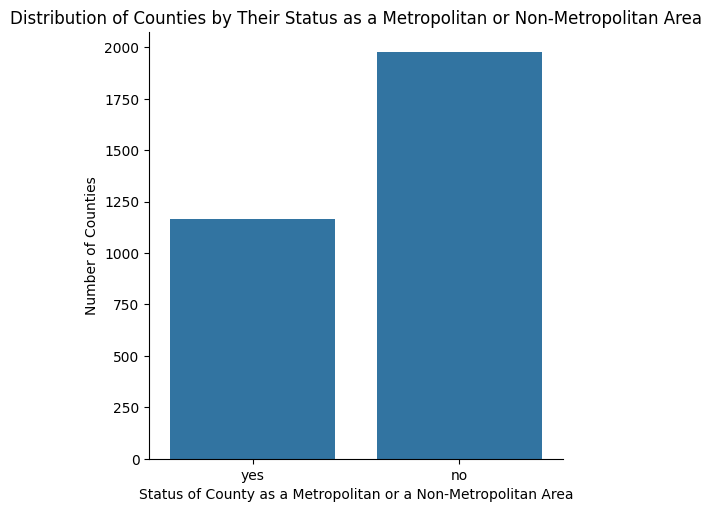

In [ ]:
sns.catplot(x="metro",
            data=county,
            kind="count")
plt.xlabel('Status of County as a Metropolitan or a Non-Metropolitan Area')
plt.ylabel('Number of Counties')
plt.title('Distribution of Counties by Their Status as a Metropolitan or Non-Metropolitan Area')
plt.show()

The overall majority of counties recorded in this data - ~2,000 - are not within a metropolitan area.

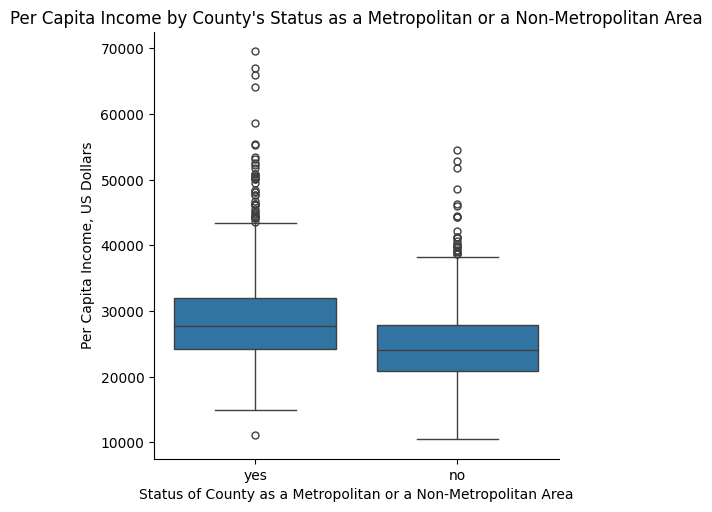

In [ ]:
sns.catplot(x="metro",
y="per_capita_income",
data=county,
kind="box")
plt.xlabel('Status of County as a Metropolitan or a Non-Metropolitan Area')
plt.ylabel('Per Capita Income, US Dollars')
plt.title("Per Capita Income by County's Status as a Metropolitan or a Non-Metropolitan Area")
plt.show()

From this boxplot, it appears not only that per capita income is, in general, higher in metropolitan areas than it is in non-metropolitan areas, but that there is a wider spread of per capita income values in metropolitan areas as well.

### **Non-Parametric Test of Median Per Capita Income**

In [ ]:
median_per_capita_income = []
for i in range(5000): #Taking 5,000 bootstrapped samples
                sample = county['per_capita_income'].values
                boot_sample = np.random.choice(sample, 314) #Taking samples of 314 observations each, roughly 10% of the original dataset.
                median_per_capita_income.append(np.median(boot_sample)) #Pulling the median of each sample.

mean_of_sample_medians = np.mean(median_per_capita_income) #Calculating the mean of the sample medians.
print(mean_of_sample_medians)

25408.403975999998


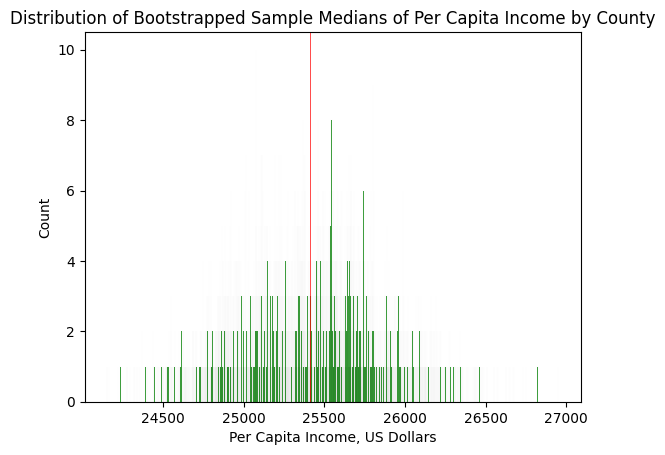

In [ ]:
sns.histplot(median_per_capita_income, bins=10000, color='green')
plt.axvline(mean_of_sample_medians, ls='-', lw=0.5, color='red')
plt.xlabel('Per Capita Income, US Dollars')
plt.title('Distribution of Bootstrapped Sample Medians of Per Capita Income by County') #Added a line showing where the mean value of
#median per capita income lays in the distribution.
plt.show()

Using a density plot, it would appear that the distribution of per capita income values is roughly normal with a slight rightward skew. Following the normal model, it appears that the average median per capita income is somewhere between 20,000 and 30,000 dollars throughout the counties of the United States.

### **Conclusion**

From my exploratory data analysis boxplot, it would appear that, in general, per capita income levels are higher in metropolitan areas than in non-metropolitan areas.

When one examines the non-parametric testing analysis of per capita income by county, however, it seems that the values for metropolitan counties do not reflect those of the country overall. After simulating 10,000 samples of 314 observations taken from the dataset, pulling the median value from each dataset, and then calculating the mean of these medians, the estimated average median per capita income by county in the United States was found to be 25,408.40 dollars. If one looks back to the boxplot, you can see that this is close to the mean per capita income in non-metropolitan counties.

The reason why the estimated mean of per capita income by county corresponds closer to that of non-metropolitan counties can possibly be found in the bar plot of metropolitan and non-metropolitan counties by count. Nearly 2/3 (~2,000) of the observed counties are characterized as non-metropolitan. The sheer number of non-metropolitan counties likely skews the dataset closer towards their parameters than those of metropolitan counties.

Although the visualizations and single instance of testing alone may not make strong enough evidence to support an argument in answer to my research question, it creates a strong starting point for further exploration of the relationship between per capita income and the status of a county as either metropolitan or non-metropolitan.